### **1. Importações**

In [52]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2


In [53]:
base = pd.read_csv("../data/categoria_capsicum.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana
0,2020-07-01,09:15,102900005117056,0.396,7.6,sale,No,1,7,9,3.01,Paopaojiao (Jingpin),Capsicum,Wednesday
1,2020-07-01,09:17,102900005117056,0.409,7.6,sale,No,1,7,9,3.11,Paopaojiao (Jingpin),Capsicum,Wednesday
2,2020-07-01,09:21,102900005117056,0.277,7.6,sale,No,1,7,9,2.11,Paopaojiao (Jingpin),Capsicum,Wednesday
3,2020-07-01,09:22,102900005117056,0.132,7.6,sale,No,1,7,9,1.00,Paopaojiao (Jingpin),Capsicum,Wednesday
4,2020-07-01,09:25,102900005116226,0.589,8.0,sale,No,1,7,9,4.71,Green Hot Peppers,Capsicum,Wednesday


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [54]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
7 Colour Pepper (1),4.41,9.87,8.94,6.16,5.23,5.46,8.59,10.69,10.45,7.67,8.25,10.22,4.07,0.0,861
7 Colour Pepper (2),7.09,10.59,10.21,4.54,4.44,5.20,6.14,7.75,8.88,10.11,8.32,11.44,5.29,0.0,1058
7 Colour Pepper (Bag),5.56,5.56,0.00,0.00,0.00,16.67,0.00,22.22,11.11,11.11,16.67,11.11,0.00,0.0,18
Bell Pepper (1),5.65,10.40,9.66,3.57,4.46,5.79,7.13,8.17,10.40,13.52,8.62,8.02,4.61,0.0,673
Bell Pepper (2),5.19,14.19,8.30,5.54,3.46,7.96,10.03,9.69,11.42,10.38,6.23,6.23,1.38,0.0,289


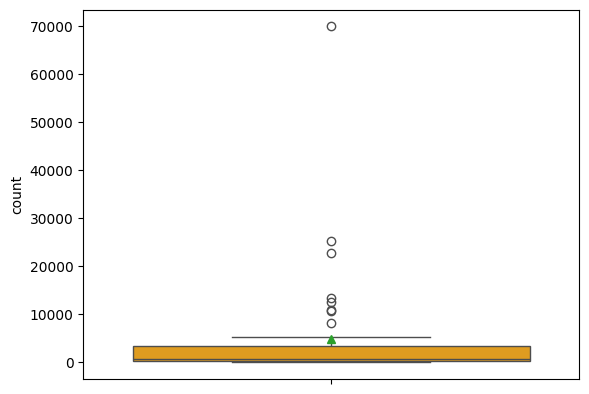

In [55]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='orange')
plt.savefig("../images/03_03_EDA_capsicum_01_distribuicao.png")

In [56]:
percentual_vendas_por_hora.describe()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
count,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,6.167442,11.966279,10.248140,4.46907,4.098140,5.361628,7.486744,9.745349,8.672326,12.660930,7.536744,7.512791,4.043721,0.032326,4837.116279
std,3.360415,8.585830,4.705581,2.19063,2.428993,3.142879,4.887261,3.791615,3.686006,14.421912,3.237886,3.284561,3.678508,0.074955,11719.144466
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.180000,10.135000,8.670000,3.90000,3.605000,4.440000,6.160000,8.860000,8.605000,8.870000,6.580000,6.140000,2.380000,0.000000,190.500000
50%,6.160000,11.470000,9.870000,5.24000,4.370000,5.150000,7.200000,9.680000,9.860000,10.430000,7.860000,7.680000,3.450000,0.000000,709.000000
75%,7.590000,12.945000,10.745000,5.85000,4.665000,5.845000,7.970000,10.630000,10.575000,11.705000,8.645000,9.605000,4.880000,0.035000,3369.500000
max,16.130000,60.000000,28.570000,7.52000,15.380000,16.670000,28.570000,22.220000,14.740000,100.000000,16.670000,14.290000,20.000000,0.420000,69945.000000


In [57]:
percentual_vendas_por_hora

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
7 Colour Pepper (1),4.41,9.87,8.94,6.16,5.23,5.46,8.59,10.69,10.45,7.67,8.25,10.22,4.07,0.00,861
7 Colour Pepper (2),7.09,10.59,10.21,4.54,4.44,5.20,6.14,7.75,8.88,10.11,8.32,11.44,5.29,0.00,1058
7 Colour Pepper (Bag),5.56,5.56,0.00,0.00,0.00,16.67,0.00,22.22,11.11,11.11,16.67,11.11,0.00,0.00,18
Bell Pepper (1),5.65,10.40,9.66,3.57,4.46,5.79,7.13,8.17,10.40,13.52,8.62,8.02,4.61,0.00,673
Bell Pepper (2),5.19,14.19,8.30,5.54,3.46,7.96,10.03,9.69,11.42,10.38,6.23,6.23,1.38,0.00,289
Bell Pepper (Bag),0.00,0.00,16.67,0.00,0.00,16.67,0.00,0.00,0.00,33.33,16.67,0.00,16.67,0.00,6
Fruit Chili,6.77,12.78,9.77,7.52,5.26,4.51,4.51,15.04,6.77,6.02,6.77,8.27,6.02,0.00,133
Fruit Pepper (Bag),7.07,7.77,5.30,6.36,5.65,8.13,5.65,8.13,10.25,7.77,10.95,10.95,6.01,0.00,283
Fruit Pepper (Orange),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,1


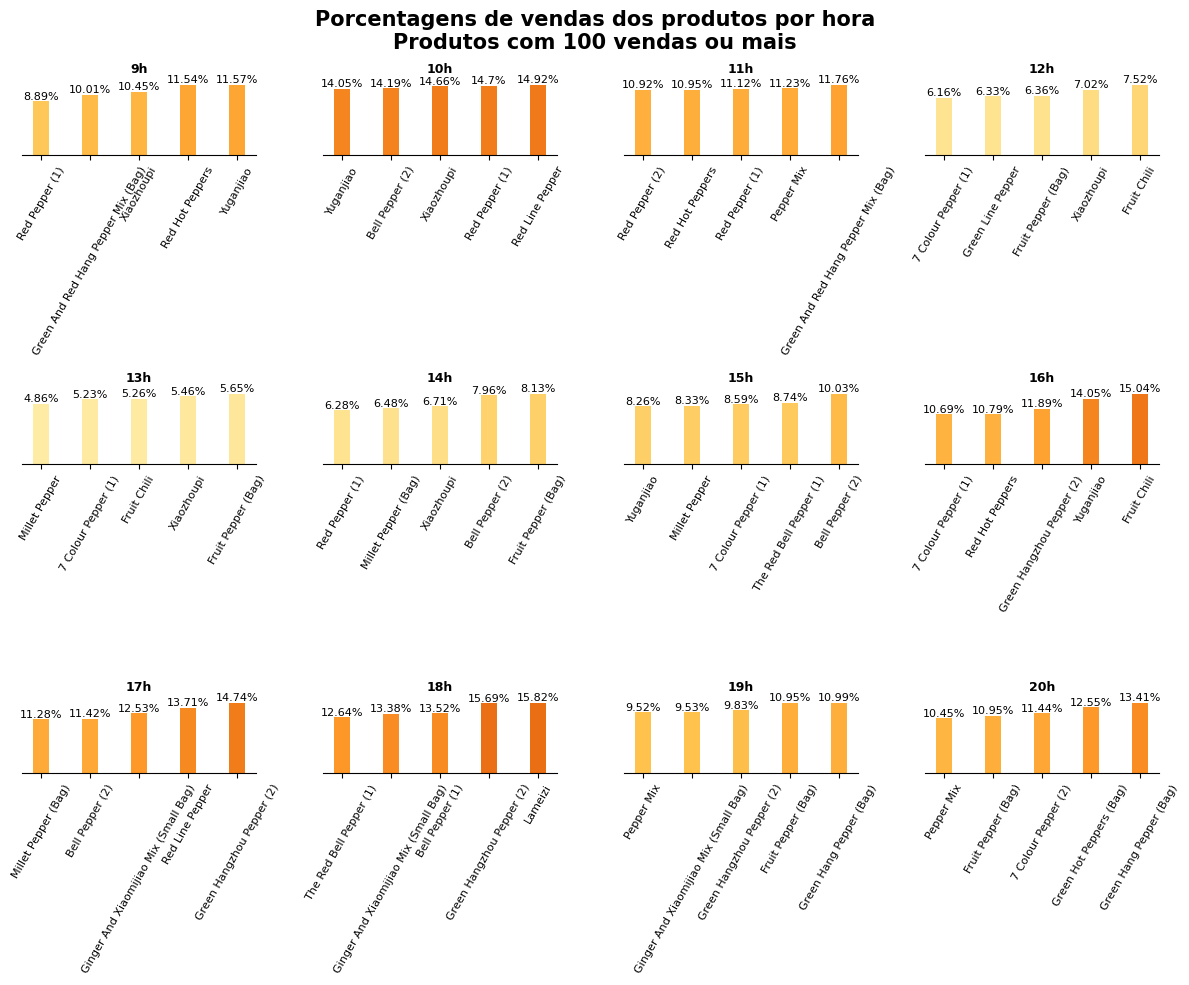

In [58]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

percentual_vendas_por_hora = percentual_vendas_por_hora.loc[percentual_vendas_por_hora['count'] >=100]

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=25)
    cmap = plt.get_cmap('YlOrBr')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=60, fontsize=8)
plt.suptitle("Porcentagens de vendas dos produtos por hora\nProdutos com 100 vendas ou mais", fontsize=15, fontweight='bold')
plt.savefig("../images/03_03_EDA_capsicum_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

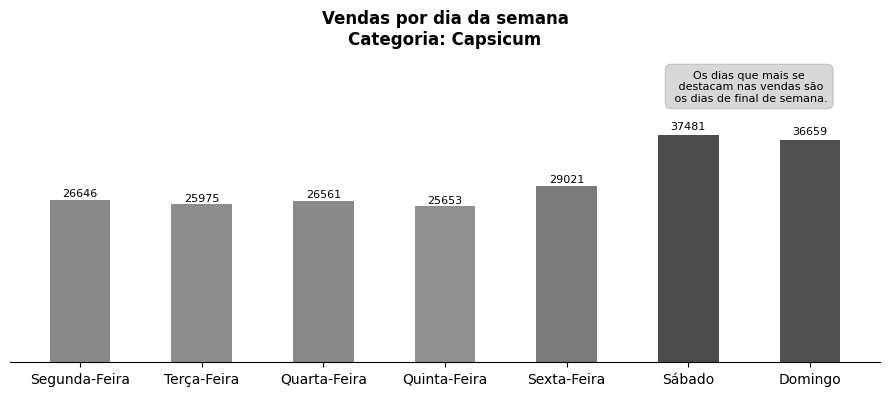

In [59]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.3)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 43000, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Capsicum", fontweight='bold', fontsize=12)
plt.savefig("../images/03_03_EDA_capsicum_03_vendas_dia_semana.png")

plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

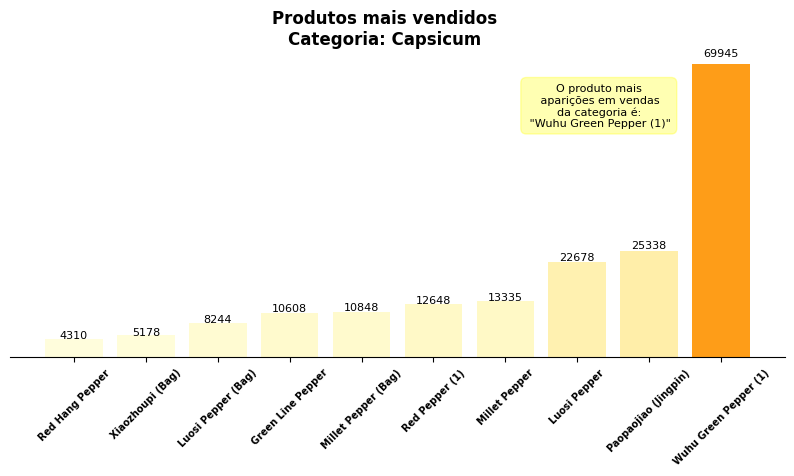

In [60]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(10,4))
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('YlOrBr')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='orange',alpha=0.4)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(7.3, 55000, f'O produto mais\n aparições em vendas\nda categoria é:\n "{a.index[-1]}"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Capsicum", fontweight='bold', fontsize=12)
plt.savefig("../images/03_03_EDA_capsicum_04_produtos_mais_vendidos.png")

plt.show()

### **5. Analisando o total arrecadado com as vendas**

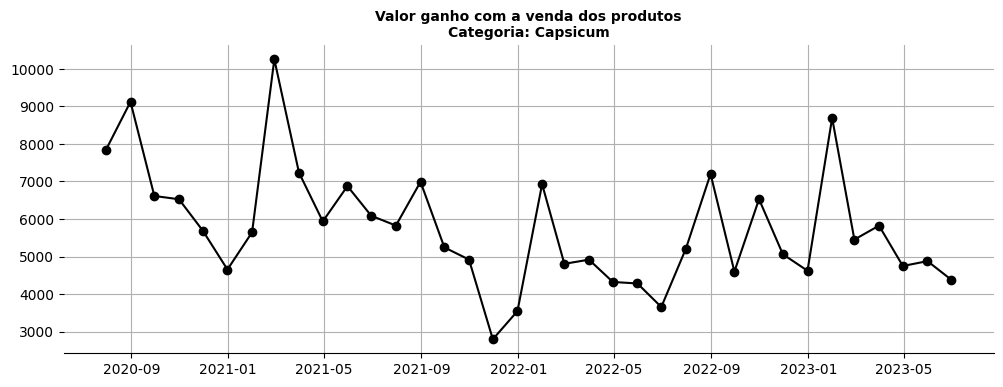

In [61]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Capsicum", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_03_EDA_capsicum_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**

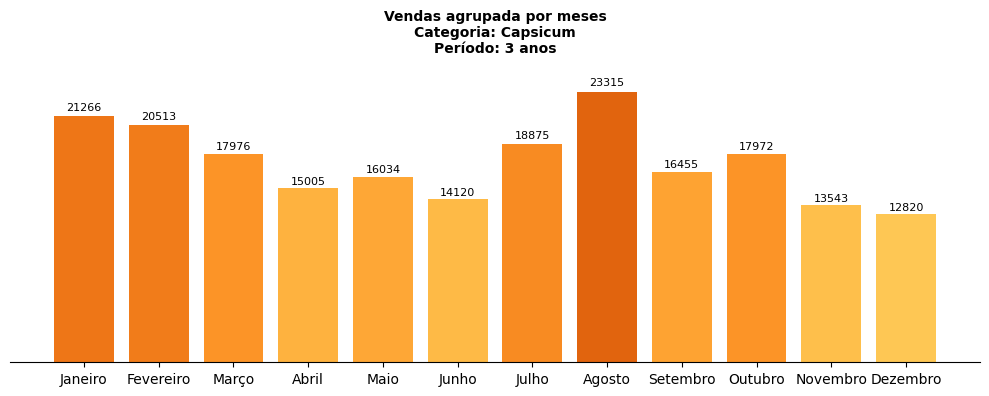

In [62]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.5)
cmap = plt.get_cmap('YlOrBr')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

plt.suptitle("Vendas agrupada por meses\nCategoria: Capsicum\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_03_EDA_capsicum_06_vendas_meses.png")
plt.show()